<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0826/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0826/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0826/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f40ad4977d0>)

In [2]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
predict = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# 合併一起一起處理, 後續分開
combine = pd.concat([datas, predict], axis=0, ignore_index=True)
combine = combine.drop(["PassengerId", "Survived"], axis=1)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# 篩選操作 Series[[跟妳資料筆數依樣多的True/False]]
s = combine.isna().sum()
s[s > 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [6]:
def cabin(c):
    if not pd.isna(c):
        return c[0]
    else:
        return None
combine["Cabin"] = combine["Cabin"].apply(cabin)

In [7]:
import re
s = "Braund, Mr. Owen Harris"
s.split(",")[-1].split(".")[0].strip()
# pat = r".+,(.+)\..+"
# re.match(pat, s).group(1).strip()
def name(s):
   return s.split(",")[-1].split(".")[0].strip()
combine["Name"] = combine["Name"].apply(name)

In [8]:
count = combine["Ticket"].value_counts()
def ticket(t):
    if not pd.isna(t):
        return count[t]
    else:
        return None
combine["Ticket"] = combine["Ticket"].apply(ticket)

In [9]:
# 資料預處理
# 1. 再丟進去的時候不能有空的格子
# 欄位分成兩種: 
# a. 類別: 只有固定數種的
# Pclass, Name(mid), Sex, Cabin(first), Embarked
# b. 數值: 大小關係, 無限可能
# Age, SibSp, Parch, Ticket(count), Fare
# 補準則: 補最可能的
# a. 類別: 最常出現的
# b. 數值(中庸值): 中位數

In [10]:
most = combine["Embarked"].value_counts().idxmax()
combine["Embarked"] = combine["Embarked"].fillna(most)

In [11]:
# df.fillna({"欄位名稱":要填的值})
med = combine.median().drop("Pclass")
combine = combine.fillna(med)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [12]:
# 篩選操作 Series[[跟妳資料筆數依樣多的True/False]]
s = combine.isna().sum()
s[s > 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [13]:
# 資料預處理
# 丟到sklearn, 所有格子內東西不能是字串了
# 2. One-Hot Encoding: 多個是非題
# NaN: 0 0 0 -> 空值可以不用補缺失, 直接用One-Hot Encoding做
# 裡面東西很多種: 絕對要做, 沒有不做道理
# 1. 對欄位沒處理好: 汽車型號 -> 汽車廠牌(One-Hot)/價錢/是不是休旅車/是不是跑車/幾門/有沒有天窗/馬力
# 2. 欄位真的比較多個(Name): 直接做沒問題, 因為決策樹本來就會選擇他覺得重要的欄位
# 我會做處理是因為 好看度/後續使用者填的時候根本不需要填
# 所以你可以捨去出現率太過稀少的值

In [14]:
# 我只保留master以上, 其他當成None -> 0 0 0
count = combine["Name"].value_counts()
reserved = count[count > 50].index
def name2(n):
    if n in reserved:
        return n
    else:
        return None
combine["Name"] = combine["Name"].apply(name2)

In [15]:
# 可以不做One-Hot?
# Pclass: 可以不做, 因為你要說他有大小關係是可以的
# Sex: 可以不做, 因為他是二值型
combine = pd.get_dummies(combine)
combine = pd.get_dummies(combine, columns=["Pclass"])

In [16]:
# 3. 看一下可不可以額外萃取出資訊(覺得合理才做)
# 我沒試過: Friend = max(0, Ticket - Family) / 船艙上中下半部 / married
combine["Family"] = combine["SibSp"] + combine["Parch"]

In [17]:
import numpy as np
x = np.array(combine.iloc[:len(datas)])
y = np.array(datas["Survived"])
predict_x = np.array(combine.iloc[len(datas):])
print(x.shape)
print(y.shape)
print(predict_x.shape)

(891, 26)
(891,)
(418, 26)


In [18]:
# 讓sklearn幫你把下面納格做很多次, 找出最佳參數
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# params = {
#     "max_depth":range(5, 11),
#     "n_estimators":range(21, 101, 2)
# }
# clf = RandomForestClassifier()
# search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
# search.fit(x, y)

In [19]:
# print(search.best_score_)
# print(search.best_params_)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=77, max_depth=7)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.84444444 0.85393258 0.75280899 0.88764045 0.87640449 0.85393258
 0.83146067 0.78651685 0.85393258 0.82022472]
0.8361298377028714


[Text(0.5769230769230769, 0.875, 'Name_Mrs <= 0.5\ngini = 0.473\nsamples = 544\nvalue = [549, 342]'),
 Text(0.3076923076923077, 0.625, 'Sex_female <= 0.5\ngini = 0.425\nsamples = 468\nvalue = [533, 235]'),
 Text(0.15384615384615385, 0.375, 'Name_Mr <= 0.5\ngini = 0.266\nsamples = 351\nvalue = [475, 89]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'SibSp <= 2.5\ngini = 0.407\nsamples = 117\nvalue = [58, 146]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'Embarked_Q <= 0.5\ngini = 0.226\nsamples = 76\nvalue = [16, 107]'),
 Text(0.7692307692307693, 0.375, 'Parch <= 3.5\ngini = 0.205\nsamples = 74\nvalue = [14, 107]'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

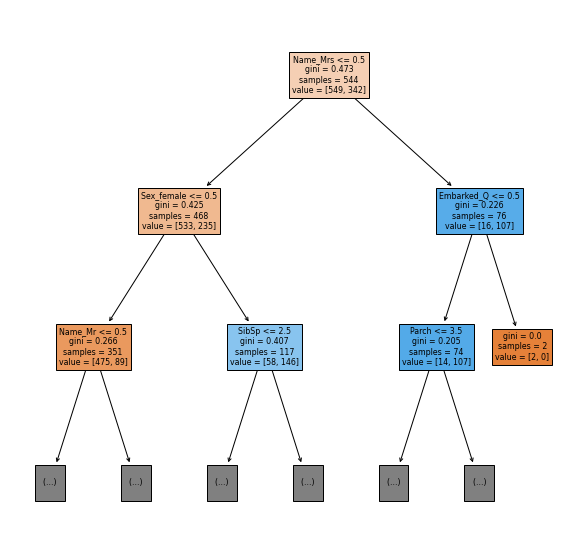

In [21]:
# 可以看一下77顆決策樹(0-76) 到底每一顆長啥樣子
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
clf = RandomForestClassifier(n_estimators=77, max_depth=7)
clf.fit(x, y)
plt.figure(figsize=(10, 10))
plot_tree(clf.estimators_[3], 
     feature_names=combine.columns,
     filled=True,
     max_depth=2)

In [22]:
clf = RandomForestClassifier(n_estimators=77, max_depth=7)
clf.fit(x, y)
pre = clf.predict(predict_x)
result = pd.DataFrame({
    "PassengerId":predict["PassengerId"],
    "Survived":pre
})
result.to_csv("rf0908.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combine_scale = scaler.fit_transform(combine)
combine_scale

array([[0.27345609, 0.125     , 0.        , ..., 0.        , 1.        ,
        0.1       ],
       [0.473882  , 0.125     , 0.        , ..., 0.        , 0.        ,
        0.1       ],
       [0.32356257, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.48014531, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.34861581, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.34861581, 0.125     , 0.11111111, ..., 0.        , 1.        ,
        0.2       ]])

In [24]:
# np array 就不用.iloc了
x_scale = np.array(combine_scale[:len(datas)])
predict_x_scale = np.array(combine_scale[len(datas):])

In [26]:
# 找knn最佳參數
# from sklearn.neighbors import KNeighborsClassifier
# params = {
#     "n_neighbors":range(2, 200)
# }
# clf = KNeighborsClassifier()
# search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
# search.fit(x_scale, y)
# print(search.best_params_)
# print(search.best_score_)

In [27]:
# 雖然上面找的是7, 但我試過 11->best
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(predict_x_scale)
result = pd.DataFrame({
    "PassengerId":predict["PassengerId"],
    "Survived":pre
})
result.to_csv("knn0908.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
clf = RandomForestClassifier(n_estimators=77, max_depth=7)
clf.fit(x, y)
pd.DataFrame({
    "Name":combine.columns,
    "Importance":clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

,Name,Importance
9,Sex_female,0.144831
7,Name_Mr,0.141389
10,Sex_male,0.106674
4,Fare,0.104987
0,Age,0.078039
24,Pclass_3,0.060488
3,Ticket,0.055293
8,Name_Mrs,0.050338
25,Family,0.049924
22,Pclass_1,0.045477
